<a href="https://colab.research.google.com/github/emmanuelssilva/ProjetoFinal2/blob/main/Sistemas_Inteligentes_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto em Sistemas Inteligentes .
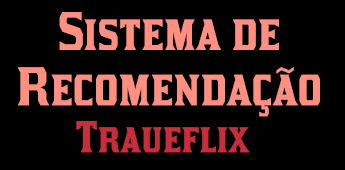
---


**Proposta.**

O sistema de recomendação é uma área da Inteligência Artificial que vem sendo utilizada comercialmente pelas maiores empresas de streaming e varejo do mundo. Esse algoritmo vem ganhando destaque nos últimos anos devido ao crescimento dessas empresas, como a Netflix, Spotify e a Amazon.
A Netflix por exemplo, usa o algoritmo para recomendar filmes e séries, a Spotify para recomendar podcasts e músicas, o Youtube para recomendar vídeos e a Amazon para recomendar os seus produtos.

A Nossa proposta é recriar um sistema semelhante ao da Netflix, por isso, desenvolvemos a Traueflix, utilizando um dataset voltado para o nicho de filmes, iremos desenvolver um algoritmo capaz de recomendar filmes para os usuários da Traueflix.


**Dados.**

O dataset que utilizamos nesse projeto é do GroupLens(GL), que é um laboratório de pesquisa do Departamento de Ciência da Computação e Engenharia da Universidade de Minnesota. A GL disponibiliza gratuitamente o dataset para pesquisas e estudos voltados para área de ciência de dados. 

O dataset que escolhemos foi o MovieLens de 100K, contendo 100.000 avaliações de 1.000 usuários em 1.700 filmes, do ano de 1998.


[Dataset utilizado no projeto](https://grouplens.org/datasets/movielens/100k/)

[grouplens.org](https://grouplens.org)

**Abordagem.**

Nós iremos utilizar a técnica de filtragem colaborativa, que será aplicada em um cenário de recomendação de filmes, utilizando uma base de dados de usuários e notas que esses usuários deram aos filmes.

**Disciplina:**

* Projeto em Sistemas Inteligentes.
* Orientador: Thiago Traue ().


**Importação das Bibliotecas e conexão com o Google Drive**

Primeiramente, iremos começar com a importação das bibliotecas e o carregamento do Google Drive.

In [ ]:
# Bibliotecas.
import numpy as np
import pandas as pd
from math import sqrt

Iremos utilizar o Google Drive para realizar o carregamento do dataset.

In [ ]:
# Conexão com o Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Distância Euclidiana**

Para a implementação de nosso sistema, utilizaremos um cálculo matemático chamado Distância Euclidiana, este cálculo irá nós auxiliar na busca de usuários com os perfis similares. Através dessa busca, quanto mais próximo um usuário for do outro, melhor será o grau de recomendação do filme e uma possível avaliação que o usuário atribuirá ao mesmo.

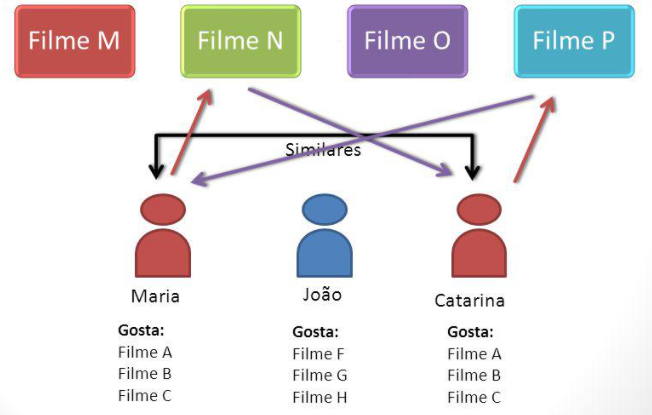

In [ ]:
# Função Euclidiana.
def calculoEuclidiana(df, usuario1, usuario2):
    si = {}
    for item in df[usuario1]:
       if item in df[usuario2]: si[item] = 1

    if len(si) == 0: return 0

    soma = sum([pow(df[usuario1][item] - df[usuario2][item], 2)
                for item in df[usuario1] if item in df[usuario2]])
    return 1/(1 + sqrt(soma))

**Recomendação**

Agora, iremos utilizar o nossa função euclidiana para recomendar filmes aos usuários da Traueflix.

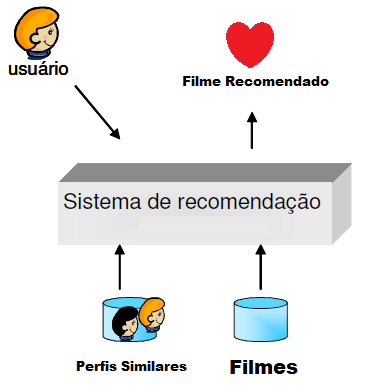

In [ ]:
def recomendarFilme(df, usuario):
    totais={} # multiplicacao da similaridade
    totalSimilaridade={} # divisao da similaridade
    for outro in df:
        if outro == usuario: continue
        similaridadeUsuario = calculoEuclidiana(df, usuario, outro)

        if similaridadeUsuario <= 0: continue

        for item in df[outro]:
            if item not in df[usuario]:
                totais.setdefault(item, 0)
                totais[item] += df[outro][item] * similaridadeUsuario
                totalSimilaridade.setdefault(item, 0)
                totalSimilaridade[item] += similaridadeUsuario
                totalSimilaridade[item]      
      
    rankings=[(totalSimilaridade[item], item) for item, total in totais.items()]
    rankings.sort()
    rankings.reverse()
    return rankings[0:15]

**Carregamento do dataset.**

Nesta Função, iremos carregar o dataset com os filmes e as avaliações.

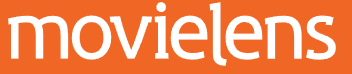

In [ ]:
# Importando o dataset do Drive.
def carregarDataset(path='/content/drive/MyDrive/SistemasInteligentes/ml-100k'):
    
    #Dataset dos filmes com id dos usuarios..
    filmes = {}
    for linha in open(path + '/u.item', encoding = "ISO-8859-1"):
        (id, titulo) = linha.split('|')[0:2]
        filmes[id] = titulo

    #Dataset dos usuarios com as avaliações.
    df = {}
    for linha in open(path + '/u.data', encoding="utf-8"):
        (usuario, idfilme, nota, tempo) = linha.split('\t')
        df.setdefault(usuario, {})
        df[usuario][filmes[idfilme]] = float(nota)
    return df
   

In [ ]:
# Chamando o dataset.
df = carregarDataset()    

**Testando e Recomendação filmes aos usuários da Traueflix.**

In [ ]:
# Filme Recomendado para o úsuario 10
recomendarFilme(df,'10')

[(99.2305687831323, 'Contact (1997)'),
 (95.93400842410836, 'Scream (1996)'),
 (91.47994378882439, 'Air Force One (1997)'),
 (78.80560567440654, 'Return of the Jedi (1983)'),
 (73.34343360915997, 'Titanic (1997)'),
 (68.47088643814818, 'Independence Day (ID4) (1996)'),
 (65.07004963195854, 'Saint, The (1997)'),
 (63.5629456114749, 'Jerry Maguire (1996)'),
 (61.82987308024594, 'Conspiracy Theory (1997)'),
 (60.179972810916865, 'Rock, The (1996)'),
 (57.600810348107935, 'Star Trek: First Contact (1996)'),
 (53.712702486110096, 'Mission: Impossible (1996)'),
 (51.24005177523445, 'Men in Black (1997)'),
 (50.560733124224576, "Dante's Peak (1997)"),
 (49.41147792265062, 'Chasing Amy (1997)')]

In [ ]:
# Filme Recomendado para o úsuario 106.
recomendarFilme(df, '106')

[(142.85649720391797, 'Contact (1997)'),
 (135.3297879646956, 'Liar Liar (1997)'),
 (134.3693169580067, 'Scream (1996)'),
 (132.2381810140139, 'Air Force One (1997)'),
 (131.8613575854524, 'Star Wars (1977)'),
 (112.99543216935527, 'Return of the Jedi (1983)'),
 (93.77509876031588, 'Independence Day (ID4) (1996)'),
 (92.51337186317394, 'Full Monty, The (1997)'),
 (92.33357824237619, 'Saint, The (1997)'),
 (91.66783305772101, 'Godfather, The (1972)'),
 (91.65228299863901, 'Conspiracy Theory (1997)'),
 (91.2476991046704, 'L.A. Confidential (1997)'),
 (85.6162540121155, 'Jerry Maguire (1996)'),
 (84.26894728552789, 'Twelve Monkeys (1995)'),
 (83.9664438784304, 'Rock, The (1996)')]

In [ ]:
# Filme Recomendado para o úsuario 19.
recomendarFilme(df, '19')

[(167.77077849262713, 'Star Wars (1977)'),
 (148.86757488033098, 'Fargo (1996)'),
 (145.4215114915239, 'Return of the Jedi (1983)'),
 (139.63022161320384, 'English Patient, The (1996)'),
 (128.3533494974596, 'Toy Story (1995)'),
 (120.99236412448111, 'Air Force One (1997)'),
 (119.12577609532919, 'Independence Day (ID4) (1996)'),
 (118.9928949874059, 'Godfather, The (1972)'),
 (112.99155176645789, 'Jerry Maguire (1996)'),
 (112.37237803094395, 'Raiders of the Lost Ark (1981)'),
 (108.15872982406324, 'Twelve Monkeys (1995)'),
 (106.53116635884378, 'Pulp Fiction (1994)'),
 (105.40273495994873, 'Star Trek: First Contact (1996)'),
 (104.05981291063149, 'Rock, The (1996)'),
 (103.66299388566975, 'Silence of the Lambs, The (1991)')]

In [ ]:
# Filme Recomendado para o úsuario 200.
recomendarFilme(df, '200')

[(68.46727281312961, 'Air Force One (1997)'),
 (62.9698814039684, 'Fargo (1996)'),
 (58.26202971813603, 'Return of the Jedi (1983)'),
 (51.753406281199176, 'Full Monty, The (1997)'),
 (49.71606671689347, 'Godfather, The (1972)'),
 (48.65584546211286, 'L.A. Confidential (1997)'),
 (46.66522007316235, 'Jerry Maguire (1996)'),
 (46.120690585515945, 'Conspiracy Theory (1997)'),
 (39.478059858214614, 'Evita (1996)'),
 (39.2834600964393, 'Chasing Amy (1997)'),
 (39.183014012587904, 'Game, The (1997)'),
 (36.49883244468032, 'Men in Black (1997)'),
 (35.683082384429824, 'In & Out (1997)'),
 (34.96601310450697, 'Sense and Sensibility (1995)'),
 (33.055255430896686, "Devil's Advocate, The (1997)")]

In [ ]:
# Filme Recomendado para o úsuario 66.
recomendarFilme(df, '66')

[(92.53993492589922, 'Fargo (1996)'),
 (84.05326848995504, 'Raiders of the Lost Ark (1981)'),
 (77.41580556370305, 'Pulp Fiction (1994)'),
 (74.44198514850719, 'Silence of the Lambs, The (1991)'),
 (71.64511677108526, 'Titanic (1997)'),
 (71.36467484455333, 'Empire Strikes Back, The (1980)'),
 (68.35548120949963, 'Back to the Future (1985)'),
 (65.54789135223659, 'Star Trek: First Contact (1996)'),
 (65.17342552941595, 'Full Monty, The (1997)'),
 (63.95470851117045, 'Saint, The (1997)'),
 (63.75456522975853, 'Princess Bride, The (1987)'),
 (63.67702123303638, 'Indiana Jones and the Last Crusade (1989)'),
 (63.430203711697345, 'Fugitive, The (1993)'),
 (62.27101564103021, 'Monty Python and the Holy Grail (1974)'),
 (59.988853416752356, 'Conspiracy Theory (1997)')]

In [ ]:
# Filme Recomendado para o úsuario 24.
recomendarFilme(df, '504')

[(81.21863293660945, 'English Patient, The (1996)'),
 (58.85747482335015, 'Titanic (1997)'),
 (54.851347363578334, 'Toy Story (1995)'),
 (54.81559153137722, 'Full Monty, The (1997)'),
 (51.444372178687026, 'L.A. Confidential (1997)'),
 (48.723895566495365, 'Saint, The (1997)'),
 (48.228848701440555, 'Conspiracy Theory (1997)'),
 (46.634400328737186, 'Twelve Monkeys (1995)'),
 (43.73632841936796, 'Star Trek: First Contact (1996)'),
 (42.2947598444059, 'Chasing Amy (1997)'),
 (41.61851538311731, 'Game, The (1997)'),
 (40.65377719579205, 'Evita (1996)'),
 (38.73242557499297, 'In & Out (1997)'),
 (38.12935393609673, 'Mission: Impossible (1996)'),
 (37.51306524240248, 'Empire Strikes Back, The (1980)')]

In [ ]:
# Filme Recomendado para o úsuario 22.
recomendarFilme(df, '22')

[(99.12035001212483, 'English Patient, The (1996)'),
 (86.45271506794016, 'Scream (1996)'),
 (83.08703006764102, 'Air Force One (1997)'),
 (77.95864769755454, 'Fargo (1996)'),
 (70.95293589982752, 'Titanic (1997)'),
 (64.96752694669652, 'Full Monty, The (1997)'),
 (63.42387445181641, 'Toy Story (1995)'),
 (62.01676770059186, 'L.A. Confidential (1997)'),
 (60.092157261595446, 'Saint, The (1997)'),
 (57.12379479457994, 'Conspiracy Theory (1997)'),
 (56.597223090131095, 'Jerry Maguire (1996)'),
 (53.91208726320636, 'Twelve Monkeys (1995)'),
 (50.42975210897799, 'Game, The (1997)'),
 (50.12905386815127, 'Chasing Amy (1997)'),
 (49.438314777701464, 'Evita (1996)')]

In [ ]:
# Filme Recomendado para o úsuario 69.
recomendarFilme(df, '69')

[(87.46852751037646, 'English Patient, The (1996)'),
 (73.76137910811707, 'Toy Story (1995)'),
 (69.21848219670056, 'Godfather, The (1972)'),
 (67.4148468973823, 'Independence Day (ID4) (1996)'),
 (62.53820222720753, 'Titanic (1997)'),
 (58.6424549393738, 'Full Monty, The (1997)'),
 (54.575306353735975, 'Back to the Future (1985)'),
 (52.62249609396222, 'Mission: Impossible (1996)'),
 (52.50025357760808, 'Indiana Jones and the Last Crusade (1989)'),
 (52.048534980450704, 'Princess Bride, The (1987)'),
 (50.350637257659926, 'Monty Python and the Holy Grail (1974)'),
 (50.10893272058344, 'Forrest Gump (1994)'),
 (49.75115090718875, 'Conspiracy Theory (1997)'),
 (48.431985395785695, 'Leaving Las Vegas (1995)'),
 (48.12805703575447, 'Men in Black (1997)')]

In [ ]:
# Filme Recomendado para o úsuario 24.
recomendarFilme(df, '24')

[(101.08405912832238, 'Star Wars (1977)'),
 (85.15958113785258, 'Return of the Jedi (1983)'),
 (75.45010011678207, 'Toy Story (1995)'),
 (75.35108448901771, 'Titanic (1997)'),
 (71.36444679527611, 'Independence Day (ID4) (1996)'),
 (68.82665802631142, 'Full Monty, The (1997)'),
 (64.67003870758705, 'Saint, The (1997)'),
 (64.35094748969487, 'L.A. Confidential (1997)'),
 (64.01958634470424, 'Raiders of the Lost Ark (1981)'),
 (60.17216636619598, 'Star Trek: First Contact (1996)'),
 (59.74317540012401, 'Conspiracy Theory (1997)'),
 (55.35721362048577, 'Mission: Impossible (1996)'),
 (54.44368492121761, 'Empire Strikes Back, The (1980)'),
 (53.17127489282026, 'Chasing Amy (1997)'),
 (52.24604165220672, 'Men in Black (1997)')]